In [1]:
import numpy as np
from keras.layers import Input
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.models import Model
from keras.layers import GlobalAveragePooling2D,MaxPooling2D,concatenate
from keras.layers import Dense,Flatten,SpatialDropout2D
# from keras.layers.merge import concatenate

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.callbacks import History
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
%matplotlib inline

In [2]:
image_size = (64, 64)

In [3]:
def plot_model_history(history):
    """
    Function to plot training and validation data of model
    
    Parameters
    ----------
    history: dictionary
             history of training and validation of model
    Returns
    -------
    None
    
    """
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [4]:
def buildNet(num_classes):
    """
    Function to build 4 layer NN with 2 Conv layers, 1 MaxPool layer,
    1 GlobalMaxPool layer and 2 Dense layers
    
    Parameters
    ----------
    num_classes: int
                 Number of classes in training data
    Returns
    -------
    Neural Network created
    """
    model1=Sequential()
    model1.add(Convolution2D(32, (3,3),input_shape=(image_size[0], image_size[1], 3),activation='relu'))
    model1.add(MaxPooling2D(pool_size=(2,2)))
    model1.add(Convolution2D(64,(3,3),activation='relu'))
    model1.add(GlobalAveragePooling2D())

    model1.add(Dense(128, activation='relu'))
    model1.add(Dense(1, activation='sigmoid'))
    model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model1.summary())
    return model1

In [5]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50

In [6]:
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
# from tensorflow.keras.models import Model

# def buildNet(num_classes):
#     # Load pre-trained ResNet50 model with weights trained on ImageNet data
#     base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

#     # Freeze the layers of the pre-trained model
#     for layer in base_model.layers:
#         layer.trainable = False

#     # Create a new model on top of the pre-trained ResNet model
#     x = base_model.output
#     x = GlobalAveragePooling2D()(x)
#     x = Dense(128, activation='relu')(x)
#     predictions = Dense(num_classes, activation='softmax')(x)

#     model_resnet = Model(inputs=base_model.input, outputs=predictions)

#     # Compile the model
#     model_resnet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#     print(model_resnet.summary())
#     return model_resnet

# Replace 'num_classes' with the number of classes in your training data
# num_classes = 10  # Replace with the actual number of classes in your dataset
# model_resnet = buildResNet(num_classes)

In [15]:
#def trainNet(X_train,y_train,X_val,y_val):
def trainNet(training_set, validation_set):
    """
    Function to train NN created
    
    Arguments
    ---------
    X_train: numpy array
             training samples
    y_train: numpy array
             labels of training samples
    
    X_val: numpy array
             validation samples
    y_val: numpy array
             labels of validation samples
    
    Returns
    -------
    history: dictionary
             history of training and validation of model
    """
    num_classes = 1 #y_train.shape[1]
    model = buildNet(num_classes)
    history = History()
    callbacks = [EarlyStopping(monitor='val_loss', patience=5),
             ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True),history]
    
    history = model.fit(training_set,
                                steps_per_epoch=int(8000 / 32),
                                epochs = 15,
                                validation_data = validation_set,
                                validation_steps = 64,
#                                 use_multiprocessing = True,
                                )
    model.save('model.keras')
    plot_model_history(history)

    #model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=30, batch_size=100,callbacks=callbacks,verbose=1)
    return history

In [16]:
def testNet(validation):
    """
    Function to load and test the model and print confusion matrix
    
    Parameters
    ----------
    X_test: numpy array
            testing samples
    y_test: numpy array
            labels of testing samples
    Returns
    -------
    pred: list
          prediction made by model
    """
    model = load_model('model.h5')
    pred=model.predict_generator(validation)
    pred=np.argmax(np.round(pred),axis=1)
    actual=np.argmax(np.round(y_test),axis=1)
    conf_matrix=confusion_matrix(actual, pred)
    print(conf_matrix)

In [17]:
if __name__=="__main__":
    """
    1.Add code to shuffle data and preprocess image data
    2.Split data into train,test sets
    3.Uncomment the code below 
    """
    #hist=trainNet(X_train,y_train,X_val,y_val)
    #plot_model_history(hist)
    #testNet(X_val,y_val)
    

In [18]:
#from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [19]:
train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)


training_set = train_datagen.flow_from_directory('dataset/train/',
                                                 target_size = image_size,
                                                 batch_size = 16,
                                                 class_mode = 'binary')

validation_set = test_datagen.flow_from_directory('dataset/test/',
                                                  target_size = image_size,
                                                  batch_size = 16,
                                                  class_mode = 'binary', shuffle=False)


Found 1392 images belonging to 2 classes.
Found 671 images belonging to 2 classes.


In [20]:
import tensorflow as tf

In [21]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,841 (108.75 KB)

 Trainable params: 27,841 (108.75 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/15
 87/250 ━━━━━━━━━━━━━━━━━━━━ 3:22 1s/step - accuracy: 0.7302 - loss: 0.5676

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


250/250 ━━━━━━━━━━━━━━━━━━━━ 150s 587ms/step - accuracy: 0.7258 - loss: 0.5522 - val_accuracy: 0.6736 - val_loss: 0.6018
Epoch 2/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 131s 519ms/step - accuracy: 0.7585 - loss: 0.5054 - val_accuracy: 0.6542 - val_loss: 0.6177
Epoch 3/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 136s 541ms/step - accuracy: 0.7677 - loss: 0.4912 - val_accuracy: 0.6587 - val_loss: 0.6123
Epoch 4/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 151s 603ms/step - accuracy: 0.7749 - loss: 0.4865 - val_accuracy: 0.6423 - val_loss: 0.6336
Epoch 5/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 184s 732ms/step - accuracy: 0.7747 - loss: 0.4880 - val_accuracy: 0.6587 - val_loss: 0.6384
Epoch 6/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 183s 729ms/step - accuracy: 0.7862 - loss: 0.4674 - val_accuracy: 0.5961 - val_loss: 0.6858
Epoch 7/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 174s 694ms/step - accuracy: 0.7917 - loss: 0.4710 - val_accuracy: 0.6706 - val_loss: 0.6530
Epoch 8/15
250/250 ━━━━━━━━━━━━━━━━━━━━ 159s 633ms/step - accuracy: 0.7850 - loss: 0.46

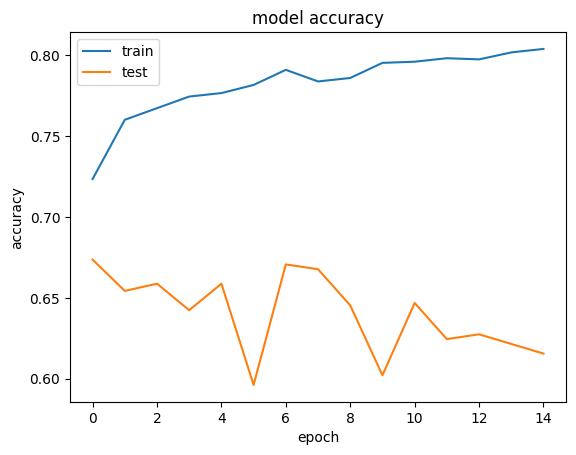

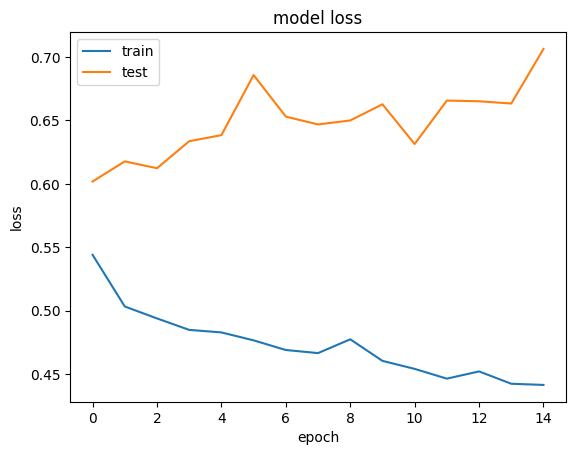

In [22]:
history = trainNet(training_set=training_set, validation_set=validation_set)

In [23]:
# mod = buildNet(1)

In [28]:
from keras.models import load_model
mod=load_model('model.keras')

In [ ]:
# test_gen = ImageDataGenerator(rescale = 1./255)

# test_data = test_datagen.flow_from_directory('final/',
#                                                   target_size = image_size,
#                                                   batch_size = 32,
#                                                   class_mode = 'binary', shuffle=False)

In [32]:
from keras.preprocessing import image
import numpy as np

def load_and_predict(model, image_path, target_size):
    # Load the image with the target size
    img = image.load_img(image_path, target_size=target_size)
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    # Expand dimensions to match the model's input shape
    img_array = np.expand_dims(img_array, axis=0)
    # Normalize pixel values to [0, 1]
    img_array /= 255.0  

    # Perform prediction
    result = model.predict(img_array)

    # Assuming binary classification: 0 -> nonsymptoms, 1 -> Symptoms
    class_label = "Symptoms" if result[0][0] > 0.5 else "nonsymptoms"
    print(f"Prediction probabilities: {result}")
    return class_label

# Example usage:
image_path_to_predict = r"C:\Users\hp\OneDrive\Desktop\Diabetic-retinopathy-detection-main\dataset\test\nonsymptoms\14984_left.jpeg"  # Change this to the path of the image you want to predict
image_size = (64, 64)  # Replace with your model's expected input size

# Ensure `mod` is loaded or trained model
prediction = load_and_predict(mod, image_path_to_predict, image_size)
print(f"The predicted class is: {prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
Prediction probabilities: [[0.31077462]]
The predicted class is: nonsymptoms
